## Loan Prediction 

### Problem

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

### Data

* Variable         -    Description

* Loan_ID          -    Unique Loan ID

* Gender           -    Male/ Female

* Married          -    Applicant married (Y/N)

* Dependents       -    Number of dependents

* Education        -    Applicant Education (Graduate/ Under Graduate)

* Self_Employed    -    Self employed (Y/N)

* ApplicantIncome  - Applicant income

* CoapplicantIncome - Coapplicant income

* LoanAmount        - Loan amount in thousands

* Loan_Amount_Term  - Term of loan in months

* Credit_History    - credit history meets guidelines

* Property_Area     - Urban/ Semi Urban/ Rural

* Loan_Status       - Loan approved (Y/N)

In [52]:
# Import EDA libraries 
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# to make the plot appear on the page
%matplotlib inline

# Transform data 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Libraries for models
from sklearn.ensemble import RandomForestClassifier


# Libraries to evaluate model 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score, f1_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

### Load Data 

In [53]:
df_train = pd.read_csv('data/train_ctrUa4K.csv')
df_test = pd.read_csv('data/test_lAUu6dG.csv')
df_train.shape

(614, 13)

### Data Cleansing

In [54]:
# check if data has any missing values 
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [55]:
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [56]:
# Split Data into X and y

X = df_train.drop('Loan_Status', axis = 1)

y = df_train['Loan_Status']

In [57]:
# Fill the missing values 

df_train['Gender'] = df_train['Gender'].fillna(df_train['Gender'].dropna().mode().values[0])
df_train['Married'] = df_train['Married'].fillna(df_train['Married'].dropna().mode().values[0])
df_train['Dependents'] = df_train['Dependents'].fillna(df_train['Dependents'].dropna().mode().values[0])
df_train['Self_Employed'] = df_train['Self_Employed'].fillna(df_train['Self_Employed'].dropna().mode().values[0])
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].dropna().median())
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].dropna().mode().values[0])
df_train['Credit_History'] = df_train['Credit_History'].fillna(df_train['Credit_History'].dropna().mode().values[0])

In [58]:
# missing values in test data set
df_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [59]:
df_test['Gender'] = df_test['Gender'].fillna(df_test['Gender'].dropna().mode().values[0])
df_test['Dependents'] = df_test['Dependents'].fillna(df_test['Dependents'].dropna().mode().values[0])
df_test['Self_Employed'] = df_test['Self_Employed'].fillna(df_test['Self_Employed'].dropna().mode().values[0])
df_test['LoanAmount'] = df_test['LoanAmount'].fillna(df_test['LoanAmount'].dropna().median())
df_test['Loan_Amount_Term'] = df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].dropna().mode().values[0])
df_test['Credit_History'] = df_test['Credit_History'].fillna(df_test['Credit_History'].dropna().mode().values[0])

In [60]:
df_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [61]:
df_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [62]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


C:\Users\Dell-PC\Desktop\ML_Projects\heart-disease_prediction\env\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


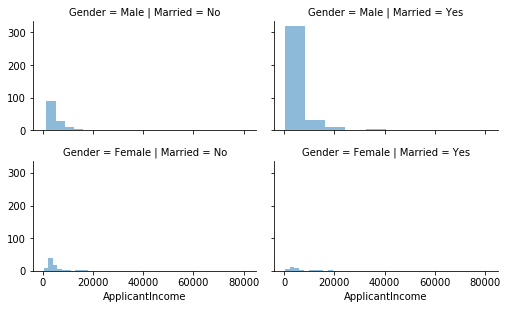

In [63]:
grid = sns.FacetGrid(df_train, row ='Gender', col='Married', size =2.2, aspect =1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha =.5, bins =10)
grid.add_legend();

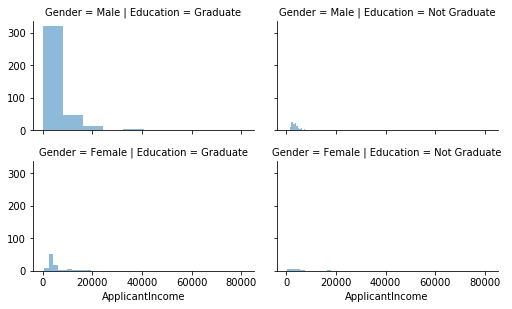

In [64]:
grid = sns.FacetGrid(df_train, row ='Gender', col='Education', size =2.2, aspect =1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha =.5, bins =10)
grid.add_legend();

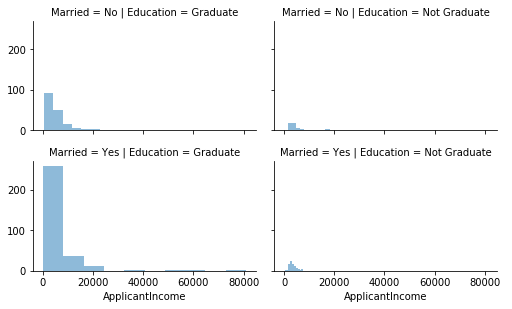

In [65]:
grid = sns.FacetGrid(df_train, row ='Married', col='Education', size =2.2, aspect =1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha =.5, bins =10)
grid.add_legend();

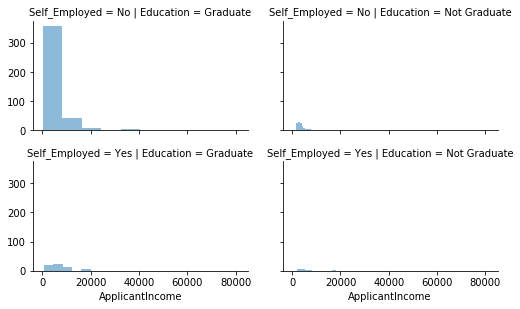

In [66]:
grid = sns.FacetGrid(df_train, row ='Self_Employed', col='Education', size =2.2, aspect =1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha =.5, bins =10)
grid.add_legend();

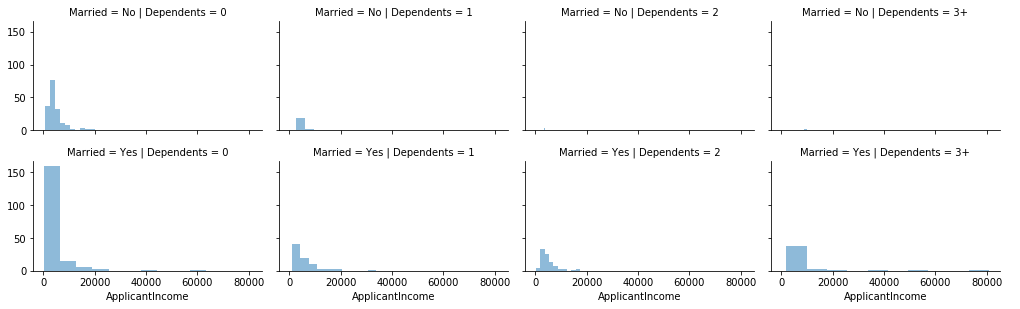

In [67]:
grid = sns.FacetGrid(df_train, row ='Married', col='Dependents', size =2.2, aspect =1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha =.5, bins =10)
grid.add_legend();

### Encode data into numerics


In [68]:
code_num = {'Male' : 1, 'Female' : 0, 
            'Yes' : 1, 'No' : 0,
           'Graduate': 1, 'Not Graduate': 0,
           'Urban' : 1, 'Semiurban': 2, 'Rural': 3,
           'Y': 1, 'N': 0,
           '3+': 3}
df_train = df_train.applymap(lambda s: code_num.get(s) if s in code_num else s)
df_test = df_test.applymap(lambda s: code_num.get(s) if s in code_num else s)

#drop the uniques loan id

df_train.drop('Loan_ID', axis = 1, inplace = True)

In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 57.7+ KB


In [70]:
# converting Dependents to numerics

Dependents_ = pd.to_numeric(df_train.Dependents)
Dependents__ = pd.to_numeric(df_test.Dependents)

df_train.drop(['Dependents'], axis = 1, inplace = True)
df_test.drop(['Dependents'], axis = 1, inplace = True)

df_train = pd.concat([df_train, Dependents_], axis = 1)
df_test = pd.concat([df_test, Dependents__], axis = 1)

In [71]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


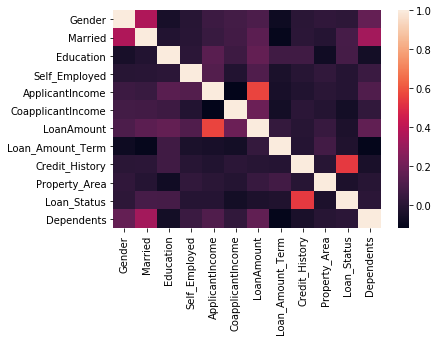

In [72]:
sns.heatmap(df_train.corr());

### Spliting data into test and training set 

In [73]:
# Split the data into X and y 

# data set without target column 
X = df_train.drop('Loan_Status', axis =1 )

# data set contain only training set 
y = df_train['Loan_Status']

# Spliting Data set into training and testing set 

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size =0.2)


### Create a model 

In [74]:
np.random.seed(42)
# Initialize a model 

model = RandomForestClassifier()

# Fit the data into the model 

model.fit(X_train, y_train)



#Predict the model

ypred = model.predict(X_test)

ypred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

### Evaluate the model 

In [75]:
# Evaluate using f1-score

evaluation = f1_score(y_test, ypred)
evaluation


0.8617021276595745

In [76]:
df_test.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents
0,LP001015,1,1,1,0,5720,0,110.0,360.0,1.0,1,0
1,LP001022,1,1,1,0,3076,1500,126.0,360.0,1.0,1,1
2,LP001031,1,1,1,0,5000,1800,208.0,360.0,1.0,1,2
3,LP001035,1,1,1,0,2340,2546,100.0,360.0,1.0,1,2
4,LP001051,1,0,0,0,3276,0,78.0,360.0,1.0,1,0


In [77]:
df_test_data = df_test.copy()
df_test_data.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents
0,LP001015,1,1,1,0,5720,0,110.0,360.0,1.0,1,0
1,LP001022,1,1,1,0,3076,1500,126.0,360.0,1.0,1,1
2,LP001031,1,1,1,0,5000,1800,208.0,360.0,1.0,1,2
3,LP001035,1,1,1,0,2340,2546,100.0,360.0,1.0,1,2
4,LP001051,1,0,0,0,3276,0,78.0,360.0,1.0,1,0


In [78]:
df_test_data.drop('Loan_ID' , axis = 1, inplace = True)

In [79]:
predicts = model.predict(df_test_data)
predicts

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [81]:
df_test.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents
0,LP001015,1,1,1,0,5720,0,110.0,360.0,1.0,1,0
1,LP001022,1,1,1,0,3076,1500,126.0,360.0,1.0,1,1
2,LP001031,1,1,1,0,5000,1800,208.0,360.0,1.0,1,2
3,LP001035,1,1,1,0,2340,2546,100.0,360.0,1.0,1,2
4,LP001051,1,0,0,0,3276,0,78.0,360.0,1.0,1,0


In [83]:
df_test['Loan_Status'] = predicts

In [86]:
df_final = df_test.drop(['Gender','Married','Education','Self_Employed'
                         ,'ApplicantIncome','CoapplicantIncome','LoanAmount',
                        'Loan_Amount_Term','Credit_History','Property_Area','Dependents'], axis = 1)

In [88]:
df_final['Loan_Status'] = df_final['Loan_Status'].map({0: 'N', 1: 'Y'})

In [89]:
df_final.to_csv('Submission.csv')

In [92]:
df_final.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
